# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
data = boston.data
f_names = boston.feature_names
target = boston.target

In [4]:
X = pd.DataFrame(data, columns=f_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=['PRICE'])
y.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=f_names)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.291339,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.333810,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.400723,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.391278,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.322701,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [9]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=f_names)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.394275,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.398264,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.392699,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.394291,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.169988,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

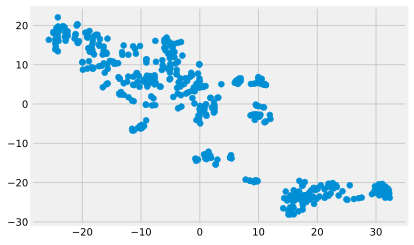

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [14]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [15]:
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Text(16,-15,'Кластер 2')

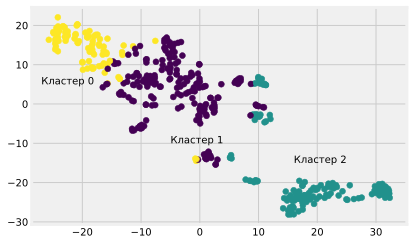

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, 5, 'Кластер 0')
plt.text(-5, -10, 'Кластер 1')
plt.text(16, -15, 'Кластер 2')

Вычислите средние значения price и CRIM в разных кластерах.

In [19]:
# создадим датафрейм со всеми необходимыми колонками
train_cp = y_train.copy()
train_cp['LABEL'] = labels_train
train_cp['CRIM'] = X_train['CRIM']
train_cp.head(3)

,PRICE,LABEL,CRIM
477,12.0,1,15.02340
15,19.9,0,0.62739
332,19.4,2,0.03466


In [20]:
# группировка по LABEL и средние значения для CRIM и PRICE
train_cp_means = train_cp.groupby('LABEL')['CRIM', 'PRICE'].mean().sort_values('CRIM')
train_cp_means

,CRIM,PRICE
LABEL,,
2,0.072118,27.874118
0,0.420986,24.971204
1,10.637094,16.179688


Text(0,0.5,'Цена на недвижимость')

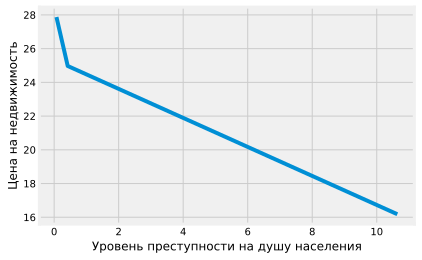

In [21]:
# построим график
plt.plot(train_cp_means['CRIM'], train_cp_means['PRICE'])
plt.xlabel('Уровень преступности на душу населения')
plt.ylabel('Цена на недвижимость')

    На графике видна отрицательная корреляция между двумя переменными (цена и уровень преступности)

# * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [22]:
labels_test = kmeans.predict(X_test_scaled)

In [23]:
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [24]:
# создадим датафрейм со всеми необходимыми колонками
test_cp = y_test.copy()
test_cp['LABEL'] = labels_test
test_cp['CRIM'] = X_test['CRIM']
test_cp.head(3)

,PRICE,LABEL,CRIM
173,23.6,0,0.09178
274,32.4,2,0.05644
491,13.6,1,0.10574


In [25]:
# группировка по LABEL и средние значения для CRIM и PRICE
test_cp_means = test_cp.groupby('LABEL')['CRIM', 'PRICE'].mean().sort_values('CRIM')
test_cp_means

,CRIM,PRICE
LABEL,,
2,0.062060,31.350000
0,0.266079,21.860784
1,10.165531,16.437143


Text(0,0.5,'Цена на недвижимость')

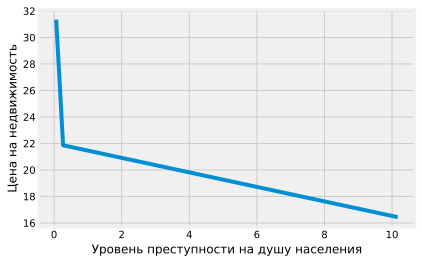

In [26]:
# построим график
plt.plot(test_cp_means['CRIM'], test_cp_means['PRICE'])
plt.xlabel('Уровень преступности на душу населения')
plt.ylabel('Цена на недвижимость')

    В тестовой выборке видна та же отрицательная корреляция, что и в обучающей выборке